# Naive Bayes Classifier

Naive Bayes family of classifiers are based on simple probabilistic models of how the data in each class might have been generated. Naive Bayes classifiers are called naive because informally, they make the **simplifying assumption that each feature of an instance is independent of the others**, given the class. 

NB usually don't generalize on the dataset well but however for high dimensional datasets they can achieve competitive performance compared to other sophisticated models.

### 2.1 Three types of Naive Bayes
1. **Bernoulli Naive Bayes** - uses a set of binary occurrence features. For instance, representing a presence or absence of text in text mining applications, with no regard to the number of occurances.
2. **Multinomial Naive Bayes** model uses a set of count base features each of which does account for how many times a particular feature such as a word is observed in training example like a document. 
3. **Gaussian Naive Bayes**:  assumes that the data for each class was generated by a simple class specific Gaussian distribution.  
    * During training, the Gaussian Naive Bayes Classifier estimates for each feature the mean and standard deviation of the feature value for each class. 
    * For prediction, the classifier compares the features of the example data point to be predicted with the feature statistics for each class and selects the class that best matches the data point. **Predicting** the class of a new data point **corresponds mathematically to estimating the probability** that each classes Gaussian distribution was most likely to have generated the data point. Classifier then picks the class that has the highest probability.
    
### 2.2 Decision Boundary
The decision boundary between classes in the two class Gaussian Naive Bayes Classifier, in general, is a parabolic curve between the classes.  And in the special case where the variance of these feature is the same for both classes, the decision boundary will be linear. In short
* same variance --> linear decision boundary
* different variance --> parabolic decision boundary

![Parabolic Decision Boundary](https://github.com/sumitkant/Coursera_UoM_Applied_Machine_Learning_in_Python/blob/master/Week%204/Images/GNB-decision_boundary.PNG?raw=true)
![](https://github.com/sumitkant/Coursera_UoM_Applied_Machine_Learning_in_Python/blob/master/Week%204/Images/GNB-decision_boundary2.PNG?raw=true)

The centers of the Gaussian's correspond to the mean value of each feature for each class. The gray ellipses show the contour line of the Gaussian distribution for each class, that corresponds to about two standard deviations from the mean. 


## 2. Load Libraries and Dataset

<IPython.core.display.Javascript object>


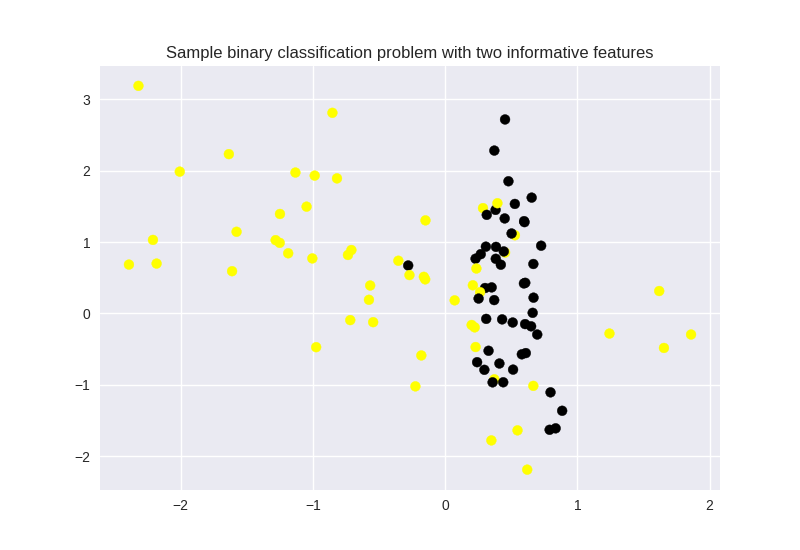

<IPython.core.display.Javascript object>


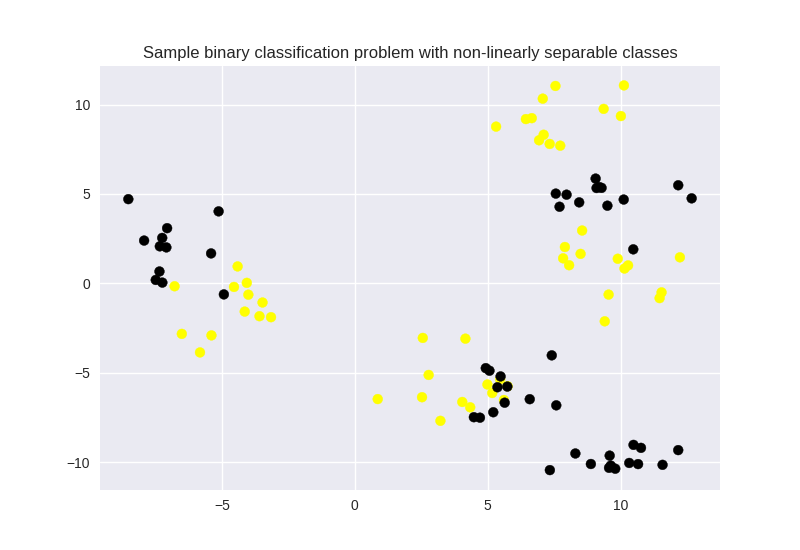

In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# synthetic dataset for classification (binary)
plt.figure()
plt.title('Sample binary classification problem with two informative features')
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_C2[:, 0], X_C2[:, 1], marker= 'o',
           c=y_C2, s=50, cmap=cmap_bold)
plt.show()

# more difficult synthetic dataset for classification (binary)
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2,
                       centers = 8, cluster_std = 1.3,
                       random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()



## 3. `GaussianNB` sklearn implementation
Naive Bayes models are among a few classifiers in scikit learn that support a method called partial fit, which can be used instead of fit to train the classifier incrementally in case you're working with a huge data set that doesn't fit into memory. 

<IPython.core.display.Javascript object>


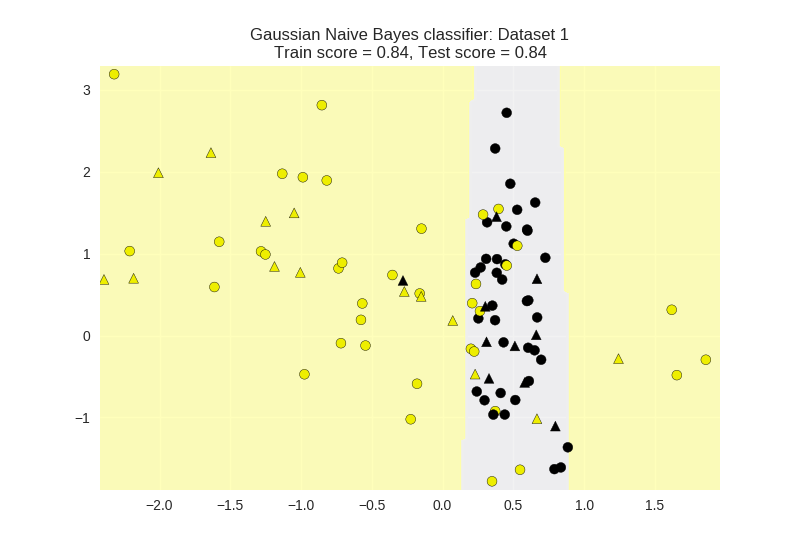

In [2]:
from sklearn.naive_bayes import GaussianNB
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2, random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 1')

<IPython.core.display.Javascript object>


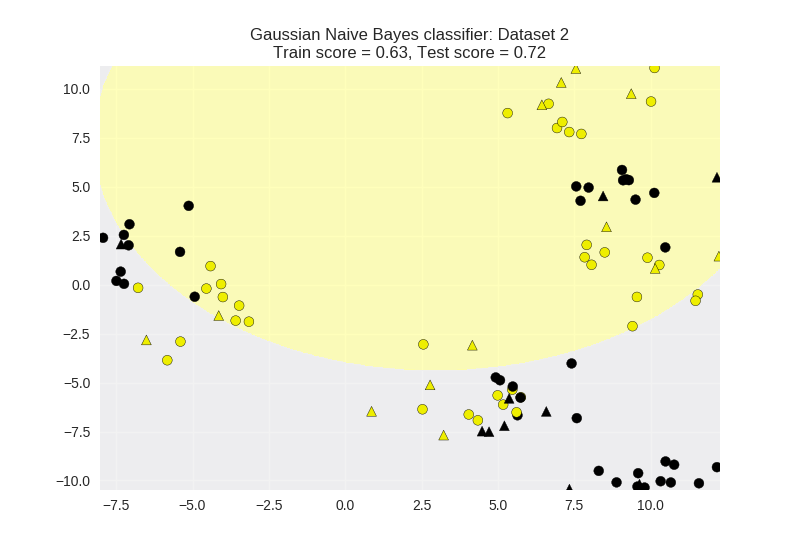

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2,
                                                   random_state=0)

nbclf = GaussianNB().fit(X_train, y_train)
plot_class_regions_for_classifier(nbclf, X_train, y_train, X_test, y_test,
                                 'Gaussian Naive Bayes classifier: Dataset 2')

### Application to a real-world dataset

In [6]:
from sklearn.datasets import load_breast_cancer

# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

nbclf = GaussianNB().fit(X_train, y_train)
print('Breast cancer dataset')
print('Accuracy of GaussianNB classifier on training set: {:.2f}'
     .format(nbclf.score(X_train, y_train)))
print('Accuracy of GaussianNB classifier on test set: {:.2f}'
     .format(nbclf.score(X_test, y_test)))

Breast cancer dataset
Accuracy of GaussianNB classifier on training set: 0.95
Accuracy of GaussianNB classifier on test set: 0.94


Typically, Gaussian Naive Bayes is used for high dimensional data. 

Naive Bayes Classifiers are related mathematically to linear models, so many of the pros and cons of linear models also apply to Naive Bayes. 

## PROS
On the positive side, Naive Bayes classifiers 
1. are fast to train and use for prediction
2. are well suitable to high dimensional data including text. The applications involving very large data sets where efficiency is critical and computational costs rule out other classification approaches. 

## CONS
On the negative side, 
1. Doesn't work well with highly correlated datasets (most likely scenario for real world datasets). Other algorithms are much likely to outperform Naive Bayes.
2. Naive Bayes classifiers produce unreliable estimates when getting confidence or probability estimates associated with predictions.


Still, Naive Bayes Classifiers can perform very competitively on some tasks, and are also often very useful as baseline models against which more sophisticated models can be compared. 